In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

In [2]:
df = pd.read_csv('data\creditcard.csv') 
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\User\AppData\Local\Temp\ipykernel_21180\1003594120.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('data\creditcard.csv')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
x = df.drop('Class',axis=1)
y = df['Class']

x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.3, random_state=10)

Não podemos apenas treinar o modelo normalmente com dados desbalanceados

ele vai acabar aprendendo a sempre prever o com maior amostrar e vai ter boa acuracia

Para isso temos algumas opções, uma delas é criar dados sinteticos para balancear

SMOTE cria esses dados

In [4]:
smote = SMOTE(random_state=10)
x_train_r, y_train_r = smote.fit_resample(x_train,y_train)

In [5]:
model = XGBClassifier(eval_metric='logloss',random_state=10)
model.fit(x_train_r, y_train_r)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [6]:
y_pred = model.predict(x_test)

In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.85      0.87      0.86       141

    accuracy                           1.00     85443
   macro avg       0.93      0.93      0.93     85443
weighted avg       1.00      1.00      1.00     85443



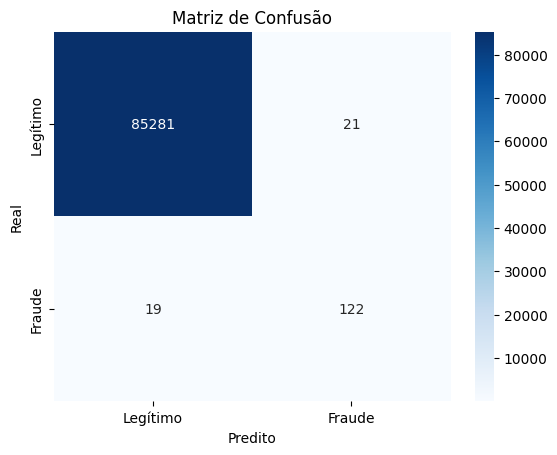

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legítimo", "Fraude"], yticklabels=["Legítimo", "Fraude"])
plt.title("Matriz de Confusão")
plt.ylabel("Real")
plt.xlabel("Predito")
plt.show()

outra forma é aumentar a punição para a classe minoritaria

isso faz com que, mesmo com poucos exemplos, o modelo aprenda a prever corretamente a classe minoritaria

scale_pos_weight é quantas vezes maior deve ser essa punição, que calculamos como a razão entre maioritaria e minoritaria

In [ ]:
n_fraud = sum(y_train == 1)
n_normal = sum(y_train == 0)
scale_pos_weight = n_normal / n_fraud
model = XGBClassifier(
    scale_pos_weight = scale_pos_weight,
    eval_metric='logloss',
    random_state=10
    )

model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [26]:
y_pred = model.predict(x_test)

In [27]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.92      0.84      0.88       141

    accuracy                           1.00     85443
   macro avg       0.96      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



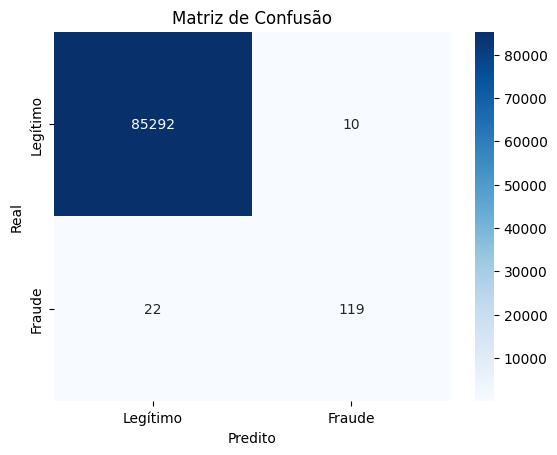

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legítimo", "Fraude"], yticklabels=["Legítimo", "Fraude"])
plt.title("Matriz de Confusão")
plt.ylabel("Real")
plt.xlabel("Predito")
plt.show()